<a href="https://colab.research.google.com/github/SamuelMiller413/Ongoing-Projects/blob/main/Copy_of_Our_first_neural_network_linear_regression_workset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/mgfrantz/CodingNomads-Intro-To-Deep-Learning/blob/master/Fundamentals/Our%20first%20neural%20network%20-%20linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import torch
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
def seed_all(seed=42):
    """
    Sets the numpy and torch random seed.
    """
    np.random.seed(seed)
    torch.random.seed = seed

seed_all()

# Single-Variable Linear Regression

In [4]:
# Create some X data
X = np.random.uniform(0, 10, 100)

In [5]:
# Define the slope (m), bias (b), and some noise we want to add to X to make y
m = 3
b = 1.8
noise = np.random.normal(scale=3, size=100) # add this so we don't have a perfect line relationship

### Exercise 2.1: Create your `y` variable

In the cell above, we've created the slope `m`, the intercept `b`, and a noise factor `noise`. 
In the cell below, use multiplication and addition to create your `y` variable.

In [6]:
# Your code here
y = m * X + b + noise

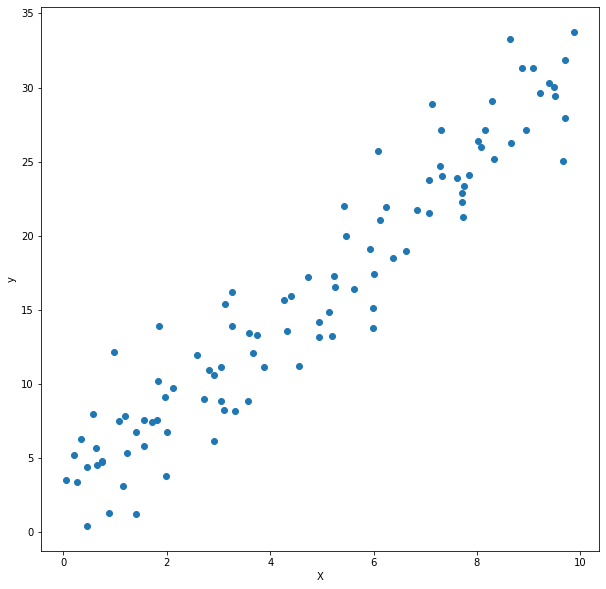

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.scatter(X, y)

### Exercise 2.2: Create a function that returns MSE

Look at some of the functions in `torch`.
Based on what you've learned in the lesson, create a function that returns the mean squared error for a `torch.Tensor` of `predictions` and `actuals`.
There is a test case below so you can understand what the inputs and outputs should be.

In [8]:
# Define MSE
def mse(predictions, actuals):
    # your code here
    sum_error = 0.0
    for i in range(len(actuals)):
        prediction_error = predictions[i] - actuals[i]
        sum_error += (prediction_error ** 2)
    mse = sum_error / float(len(actuals))
    return mse 
    # raise NotImplementedError("Implement MSE, then remove this line")

In [9]:
ys = torch.tensor([1,2,3])
yhats = torch.tensor([1.1, 2.1, 3.1])
assert isinstance(mse(ys, yhats), torch.Tensor), "The output of mse should be a torch.Tensor!"
assert torch.allclose(mse(ys, yhats), torch.tensor(0.01)), "The MSE should be about 0.01"

In [10]:
# From Class

# ys = [y1, y2, ..., yn]
# yhats = [yhat1, yhat2, ..., yhatn]

# mse = ((ys - yhat)**2).mean()

In [11]:
mse(ys, yhats)

tensor(0.0100)

In [12]:
# Now that we've defined MSE, let's just use Torch's.
mse_loss = nn.MSELoss()
mse_loss(ys, yhats)

tensor(0.0100)

In [13]:
# We can also use the functional API to calculate MSE
F.mse_loss(ys, yhats)

tensor(0.0100)

### Exercise 2.3: Based on your knowledge of `scikit-learn`, perform a linear regression to predict `y` from `X`.

Fill in the code to fit a linear regression model and find the coefficient(s) and intercept/bias.
Are your slope and intercept in the ballpark of the sope and intercept we defined earlier in the notebook?

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
# Fit a linear model on our data
lr = LinearRegression()
X = X.reshape(-1,1)
lr.fit(X,y)# Instantiate and fit a vanilla linear regression

LinearRegression()

In [16]:
# Display the slope and intercept
slope = lr.coef_ # Your code here
intercept = lr.intercept_ # Your code here



assert isinstance(slope, np.ndarray)
assert isinstance(intercept, float)

print(f'The slope is {str(slope)} and the intercept is {intercept}')

The slope is [2.86206803] and the intercept is 2.4452884726402466


In [17]:


assert isinstance(intercept, float)

In [18]:
# Calculate the mean squared error
predictions = lr.predict(X) # Your code here
lr_mse = mean_squared_error(y, predictions)

print(f'The mean squared error from our linear regression is {lr_mse}')

The mean squared error from our linear regression is 7.259261075703482


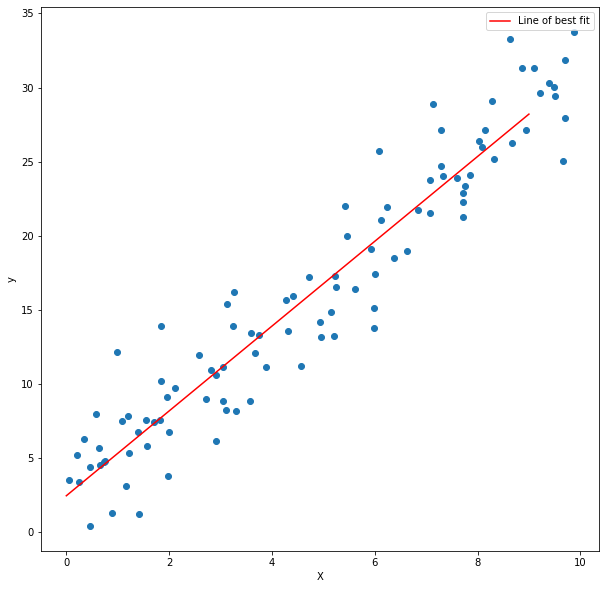

In [19]:
# Plot our line of best fit
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.scatter(X, y)
_x = np.arange(0, 10)
_y = _x * lr.coef_[0] + lr.intercept_
ax.plot(_x, _y, c='red', label=f"Line of best fit")
ax.legend()

In [54]:
# Because we're in torch now, let's just turn X and y into tensors.
X = torch.tensor(X)
y = torch.tensor(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


## Exercise 2.4: Complete the `forward` method

Based on your knowledge of single-variable linear models and object-oriented programming, complete the `forward` method in the `LinReg` class.
This method should take the input X, multiply it by the `slope` class attribute, and add the `bias` class attribute.

In [62]:
# From Class

# mean_squared_error(y, lr.predict(X.reshape(-1, 1)))

In [63]:
# Build our linear regression model
class LinReg(nn.Module):
    def __init__(self):
        super().__init__()
        # Randomly initialize 2 parameters, one for our slope and one for our bias.
        self.slope = nn.Parameter(torch.rand(1))
        self.bias = nn.Parameter(torch.rand(1))

    def forward(self, X):
        pred = X * self.slope + self.bias
        return pred
         

In [64]:
lr = LinReg()
# mean_squared_error(y, lr(X.reshape(-1, 1)))

In [66]:
yhat =lr(X)

In [67]:
yhat.shape

torch.Size([100, 1])

## Exercise 2.5: Modifying the learning rate and number of epochs

Change the number of epochs `N_EPOCHS` and learning rate `LR` variables.
What do you observe about the loss over time and  when the learning rate becomes too large or too small?

In [68]:
N_EPOCHS = 500
LR = 1e-3


In [69]:
slopes = []
biases = []
losses = []
_alphas = []
for i in range(N_EPOCHS):
    # Make some inferences
    yhat = lr(X)
    # Measure how bad those guesses were
    loss = F.mse_loss(yhat, y)
    if i%(N_EPOCHS/10)==0:
        print(f"Epoch {i} Train Loss: {loss:.04f}")
    # Calculate the gradient of all the parameters with respect to the loss
    loss.backward()
    # Apply the SGD update rule
    lr.slope.data.sub_(lr.slope.grad * LR)
    lr.bias.data.sub_(lr.bias.grad * LR)
    # Zero out the gradients for the next round
    lr.slope.grad.zero_()
    lr.bias.grad.zero_()

    # Record the parameters and losses so we can plot them out later
    slopes.append(float(lr.slope.data.detach().numpy()))
    biases.append(float(lr.bias.data.detach().numpy()))
    losses.append(float(loss.detach().numpy()))
    _alphas.append(i/N_EPOCHS)

Epoch 0 Train Loss: 273.8457
Epoch 50 Train Loss: 137.3026
Epoch 100 Train Loss: 133.9729
Epoch 150 Train Loss: 131.0071
Epoch 200 Train Loss: 128.2017
Epoch 250 Train Loss: 125.5477
Epoch 300 Train Loss: 123.0370
Epoch 350 Train Loss: 120.6618
Epoch 400 Train Loss: 118.4147
Epoch 450 Train Loss: 116.2889


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  if __name__ == '__main__':


In [70]:
lr.slope, lr.bias

(Parameter containing:
 tensor([1.7127], requires_grad=True), Parameter containing:
 tensor([4.7592], requires_grad=True))

Let's plot what we've done so far.
The blue dots represent the data, and the red lines represent the functions created by our slopes and biases as the model learns.
The more transparent lines are the first iterations in our training loop.
Notice that as the lines get more solid, they fit the data better.
This illustrates the process of our model learning the data!

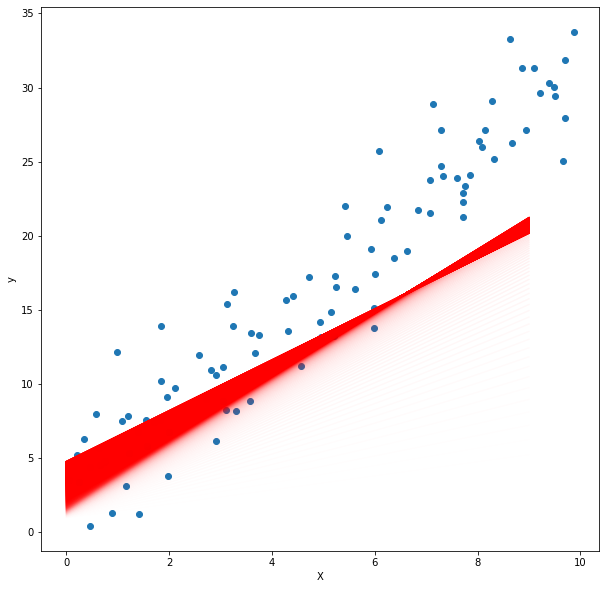

In [71]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.scatter(X, y)
for s, b, a in zip(slopes, biases, _alphas):
    _x = np.arange(0, 10)
    _y = _x * s + b
    ax.plot(_x, _y, alpha=a, c='red', label=f"Epoch {int(a)}")


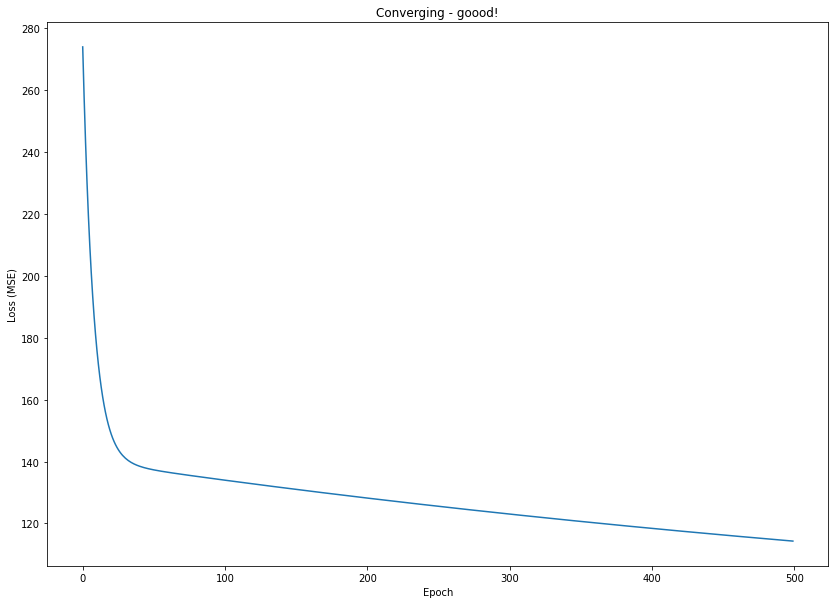

In [72]:
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(losses)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (MSE)')
if (losses[-1] > losses[0]) | np.isnan(losses[-1]):
    ax.set_title('Diverging - BAD!')
else:
    ax.set_title('Converging - goood!')

<!-- split -->

# Multi-varable linear regression

In [73]:
# Make yet another fake dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=3, n_informative=2, bias=3, noise=2)

In [74]:
# No more bad habits, we need to split our data.
X_train, X_valid, y_train, y_valid = (torch.tensor(i).float() for i in train_test_split(X, y, test_size=0.1, random_state=42))

## Exercise 2.6: Create `weights` and `bias` tensors

In the cell below, create a `weights` tensor and a `bias` tensor.
For both of these tensors, use the [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html) function.
The `weights` tensor should have as many values as `X_train` has features.
The `bias` tensor should just be a single random value.

Once you've created these tensors, turn them into parameters using the [`nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html) class.
If you need a reference here, look at how this was done when we created the `LinReg` class in Exercise 2.4.

In [79]:
X_train.shape

torch.Size([900, 3])

In [83]:
# Let's create some temporary weights and biases and test out our matrix operations before we build our model.
# Create a weights parameter with 1 beta per column in X

# EXAMPLE:
# class MyLinear(nn.Module):
#   def __init__(self, in_features, out_features):
#     super().__init__()
#     self.weight = nn.Parameter(torch.randn(in_features, out_features))
#     self.bias = nn.Parameter(torch.randn(out_features))

#   def forward(self, input):
#     return (input @ self.weight) + self.bias


weights = nn.Parameter(torch.rand(3)) # 
# Create our bias parameter
bias = nn.Parameter(torch.rand(1))

In [84]:
# Test out the operation we want to perform in the forward pass
torch.matmul(X_train[:10], weights) + bias

tensor([-0.5477, -0.0453,  0.2803,  0.1479, -0.3267, -0.0611,  0.4745,  0.1412,
         0.0858,  0.6047], grad_fn=<AddBackward0>)

In [85]:
# FYI: @ does the same thing as matmul in this context and is easier
X_train[:10]@weights + bias

tensor([-0.5477, -0.0453,  0.2803,  0.1479, -0.3267, -0.0611,  0.4745,  0.1412,
         0.0858,  0.6047], grad_fn=<AddBackward0>)

In [86]:
# Sanity check: different implementations of our forward pass are the same
assert (X_train@weights + bias == torch.matmul(X_train, weights) + bias).all()

In [87]:
# Let's make our model
class LinRegMulti(nn.Module):
    def __init__(self, n_cols):
        super().__init__()
        self.n_cols = n_cols

        self.weights = nn.Parameter(torch.rand(self.n_cols))
        self.bias = nn.Parameter(torch.rand(1))
    
    def forward(self, X):
        return X@self.weights.T + self.bias

In [88]:
N_EPOCHS = 10000
LR = 1e-3

In [89]:
lrm = LinRegMulti(X_train.shape[1])

In [90]:
# Instead of updating each parameter individually, let's make an update rule function.
def gd_update_rule(parameters, lr):
    parameters.data.sub_(parameters.grad * lr)
    parameters.grad.zero_()

In [91]:
train_losses = []
valid_losses = []

In [92]:
for i in range(N_EPOCHS):
    yhat = lrm(X_train)
    loss = mse(yhat, y_train)
    loss.backward()
    for p in lrm.parameters():
        gd_update_rule(p, LR)
    train_losses.append(loss.detach().numpy())

    with torch.no_grad():
        yhat = lrm(X_valid)
        valid_loss = mse(yhat, y_valid)
        valid_losses.append(valid_loss.numpy())

    if i%(N_EPOCHS/10) == 0:
        print(f"Epoch {i} Train Loss: {loss:.04f}, Valid Loss: {valid_loss:.04f}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2318.)
  # This is added back by InteractiveShellApp.init_path()


Epoch 0 Train Loss: 2045.9030, Valid Loss: 2469.1990
Epoch 1000 Train Loss: 53.2189, Valid Loss: 64.4583
Epoch 2000 Train Loss: 5.3655, Valid Loss: 5.9474
Epoch 3000 Train Loss: 4.1693, Valid Loss: 4.2584
Epoch 4000 Train Loss: 4.1385, Valid Loss: 4.1792
Epoch 5000 Train Loss: 4.1377, Valid Loss: 4.1719
Epoch 6000 Train Loss: 4.1377, Valid Loss: 4.1711
Epoch 7000 Train Loss: 4.1377, Valid Loss: 4.1712
Epoch 8000 Train Loss: 4.1377, Valid Loss: 4.1712
Epoch 9000 Train Loss: 4.1377, Valid Loss: 4.1712


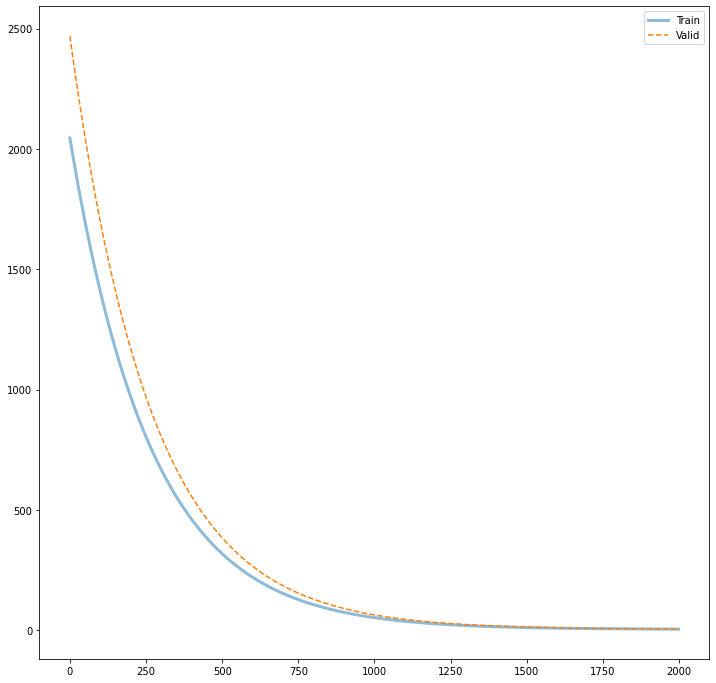

In [93]:
EPOCHS_TO_SHOW = 2000
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(train_losses[:EPOCHS_TO_SHOW], label='Train', linewidth=3, alpha=0.5)
ax.plot(valid_losses[:EPOCHS_TO_SHOW], ls='--', label='Valid')
ax.legend()

In [94]:
lrm.weights

Parameter containing:
tensor([2.7642e-02, 4.1119e+01, 2.4042e+01], requires_grad=True)

In [95]:
lrm.bias

Parameter containing:
tensor([2.9828], requires_grad=True)

## The `Linear` layer


In [97]:
class Linear(nn.Module):
    def __init__(self, dim_in, dim_out):
        super().__init__()
        self.weights = nn.Parameter(torch.rand((dim_in, dim_out)))
        self.bias = nn.Parameter(torch.rand(dim_out))
    
    def forward(self, X):

        return X@self.weights + self.bias

In [98]:
# Let's compare our Linear class with nn.Linear
l1 = Linear(3, 5)
l2 = nn.Linear(3, 5)

In [99]:
l2.weight

Parameter containing:
tensor([[ 0.1265, -0.4785, -0.2029],
        [ 0.4766, -0.3583,  0.4647],
        [-0.4211, -0.1309, -0.5199],
        [ 0.5383, -0.0140, -0.1477],
        [ 0.4269, -0.4111,  0.2948]], requires_grad=True)

In [100]:
l1.weights

Parameter containing:
tensor([[0.1716, 0.8918, 0.4475, 0.8085, 0.9105],
        [0.1407, 0.3519, 0.3024, 0.9879, 0.7246],
        [0.6708, 0.7414, 0.2102, 0.6046, 0.7482]], requires_grad=True)

In [101]:
l1.weights.data.copy_(l2.weight.T)
l1.bias.data.copy_(l2.bias)

tensor([ 0.4419,  0.3653,  0.4438, -0.5531, -0.2319], grad_fn=<CopyBackwards>)

In [102]:
l1(X_train[:5])

tensor([[ 0.6045,  0.3590,  0.8061, -1.3387, -0.2261],
        [ 0.2889, -0.3077,  0.9362, -0.8497, -0.8069],
        [ 0.1168, -0.0227,  0.4745, -0.5693, -0.6230],
        [ 0.5171,  0.4001,  0.4427, -0.4057, -0.1774],
        [ 1.1105,  0.9730,  0.5486, -0.5677,  0.4236]], grad_fn=<AddBackward0>)

In [103]:
l2(X_train[:5])

tensor([[ 0.6045,  0.3590,  0.8061, -1.3387, -0.2261],
        [ 0.2889, -0.3077,  0.9362, -0.8497, -0.8069],
        [ 0.1168, -0.0227,  0.4745, -0.5693, -0.6230],
        [ 0.5171,  0.4001,  0.4427, -0.4057, -0.1774],
        [ 1.1105,  0.9730,  0.5486, -0.5677,  0.4236]],
       grad_fn=<AddmmBackward0>)

In [104]:
assert (l1(X_train[:5]) == l2(X_train[:5])).all()

Sometimes `torch`'s implementations with some optimizations that make operations run faster.
We'll see examples of this later in the course.
I was just curious to see whether `torch`'s implementation was significantly faster than ours using `%%timeit`.

In [105]:
%%timeit 
l1(X_train[:5])

The slowest run took 70.47 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 17.7 µs per loop


In [106]:
%%timeit
 l2(X_train[:5])

The slowest run took 12.83 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 17.7 µs per loop


## Nonlinearities (activation functions)

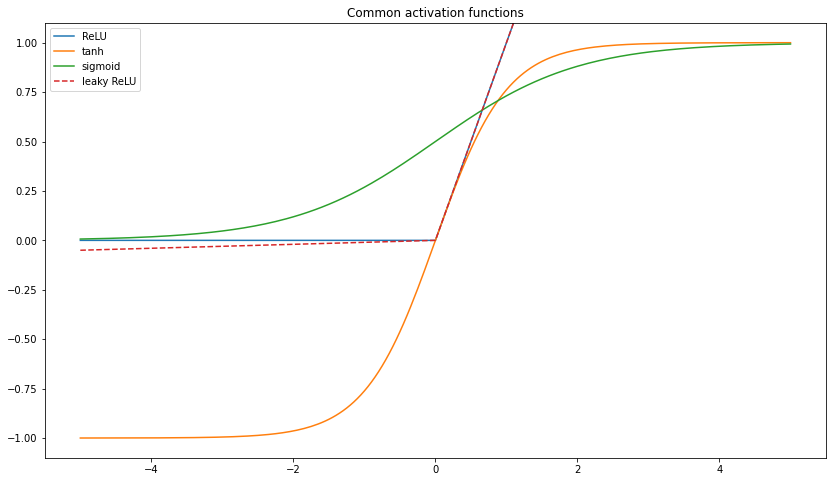

In [107]:
rng = torch.arange(-5, 5.01, 0.05)
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(rng, F.relu(rng), label='ReLU')
ax.plot(rng, torch.tanh(rng), label='tanh')
ax.plot(rng, torch.sigmoid(rng), label='sigmoid')
ax.plot(rng, F.leaky_relu(rng, negative_slope=0.01), ls='--', label='leaky ReLU')
ax.set_ylim(-1.1, 1.1)
ax.set_title('Common activation functions')
ax.legend()

## Exercise 2.7: Explore our neural network

In this exercise, use the code below to explore different aspects of our nerual netowrk.
For each of the following scenarios, inspect the plots of the train/validaiton loss at the end of the notebook and record what happens with each experient you do.
Try to...
* Switch out `nn.Linear` for the `Linear` class we defined earlier. Do these networks learn differently?
* What happens if if we use `MultiLayerRegressor` (the subclassing API) vs. the `multilayer_regressor` function (the sequential API)? Are these equivalent?
* What happens as you increase the `hiiden_dim`? 
* Remove the nonlinearity. Does your network learn as well?
* Try adding at least 1 layer in between the input and output layers of the network, with a nonlinearity. **NOTE:** Since we're learning a really simple function, additional layers may not help our loss.

In [242]:
class MultiLayerRegressor(nn.Module):
    def __init__(self, dim_in, hidden_dim):
        super().__init__()
        # self.first_layer = Linear(dim_in, hidden_dim)
        self.first_layer = nn.Linear(dim_in, hidden_dim)
        # self.second_layer = Linear(hidden_dim, 1)
        self.second_layer = nn.Linear(hidden_dim, 1)
    
    
    def forward(self, X):
        x = self.first_layer(X)
        # x = relu(x)
        # x = F.relu(x)
        x = self.second_layer(x)
        return x

In [249]:
def multilayer_regressor(in_dim, hidden_dim):
    return nn.Sequential(
        nn.Linear(in_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(in_dim, 1),
        nn.ReLU(),
        nn.Linear(hidden_dim, 1),
    )

In [250]:
# mlr = MultiLayerRegressor(3, 5)
mlr = multilayer_regressor(3, 8)

In [251]:
train_losses = []
valid_losses = []

In [252]:
LR = 1e-3
N_EPOCHS = 20000

In [253]:
# Notice that instead of iterating through our parameters and applying
# an update rule, we're just using torch's built in SGD optimizer.
opt = optim.SGD(mlr.parameters(), lr=LR)

In [254]:
for i in range(N_EPOCHS):
    yhat = mlr(X_train).squeeze()
    loss = F.mse_loss(yhat, y_train)
    loss.backward()
    opt.step()
    opt.zero_grad()
    train_losses.append(loss.detach().numpy())

    with torch.no_grad():
        yhat = mlr(X_valid).squeeze()
        valid_loss = F.mse_loss(yhat, y_valid)
        valid_losses.append(loss.numpy())
    
    if i%(N_EPOCHS/10) == 0:
        print(f"Epoch {i} Train loss: {loss:.04f}, Valid loss: {valid_loss:.04f}")

RuntimeError: ignored

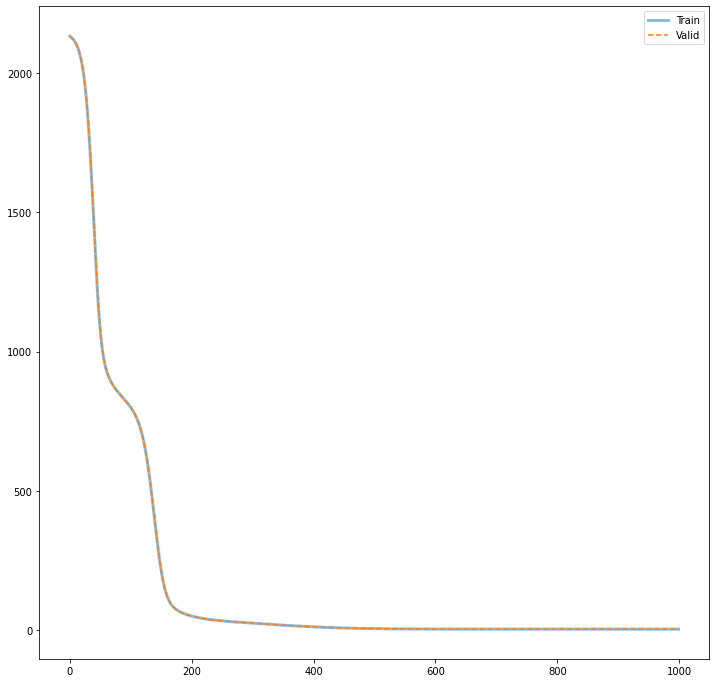

In [241]:
idx=1000
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(train_losses[:idx], label='Train', linewidth=3, alpha=0.5)
ax.plot(valid_losses[:idx], ls='--', label='Valid')
ax.legend()

In this exercise, use the code below to explore different aspects of our nerual netowrk. For each of the following scenarios, inspect the plots of the train/validaiton loss at the end of the notebook and record what happens with each experient you do. Try to...

- Switch out nn.Linear for the Linear class we defined earlier. Do these networks learn differently?

    ***Response:*** The custom *Linear* method converges more slowly than the *nn* method.


- What happens if if we use MultiLayerRegressor (the subclassing API) vs. the multilayer_regressor function (the sequential API)? Are these equivalent?
    
    ***Response:*** The *multilayer_regressor* learns in what appears to be a more step-like fashion: 
    
    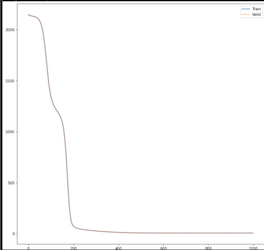


- What happens as you increase the hidden_dim?
    
    ***Response:*** After increasing the hidden_dim to 5 for the *MultiLayerRegressor*, it learns well but not better. In this case, additional layers aren't helpful


- Remove the nonlinearity. Does your network learn as well?

    ***Response:*** It converges quickly and flatens out. The resulting loss was slightly higher but perhaps negligible at: 
    
    **No ReLU: Epoch 18000 Train loss: 4.1377, Valid loss: 4.1708**
    
    **With ReLU: Epoch 18000 Train loss: 4.12, Valid loss: 4.16**

- Try adding at least 1 layer in between the input and output layers of the network, with a nonlinearity. NOTE: Since we're learning a really simple function, additional layers may not help our loss.

    ***Response:*** I'm having trouble here when trying to add layers. I keep getting the error:

            RuntimeError: mat1 and mat2 shapes cannot be multiplied (900x8 and 3x1)

    I'm not sure how to properly adjust the code to add layers. I'll look into it but it would be great to discuss it in our upcoming meeting!
    

